In [25]:
import pandas as pd

df_bitcoin_tweet = pd.read_csv('bitcoin_tweets_clean_sentiment.csv')

# # Convert to datetime and floor to hourly
# df_bitcoin_tweet['date'] = pd.to_datetime(df_bitcoin_tweet['date'], utc=True)
# df_bitcoin_tweet['date_minute'] = df_bitcoin_tweet['date'].dt.floor('T')
df_bitcoin_tweet

,intensity_score,positive_score,negative_score,neutral_score,textblob_polarity,text_length,date_minute,sentiment_score
0,0.5542,0.086,0.000,0.914,0.145833,39,2022-03-02 16:38:00+00:00,1
1,0.8221,0.229,0.000,0.771,0.275000,32,2022-03-02 16:38:00+00:00,1
2,0.0000,0.000,0.000,1.000,0.000000,6,2022-03-02 16:38:00+00:00,0
3,0.7003,0.158,0.054,0.788,-0.450000,31,2022-03-02 16:38:00+00:00,1
4,-0.1779,0.051,0.074,0.875,0.375000,28,2022-03-02 16:38:00+00:00,-1
...,...,...,...,...,...,...,...,...
1374608,0.3395,0.076,0.040,0.884,0.200000,37,2022-06-24 23:59:00+00:00,1
1374609,0.3395,0.076,0.040,0.884,0.200000,37,2022-06-24 23:59:00+00:00,1
1374610,0.0000,0.000,0.000,1.000,0.000000,7,2022-06-24 23:59:00+00:00,0
1374611,0.3395,0.076,0.040,0.884,0.200000,37,2022-06-24 23:59:00+00:00,1


In [26]:
# label_to_num = {
#     'positive': 1,
#     'neutral': 0,
#     'negative': -1
# }

# # df_bitcoin_tweet['sentiment_score'] = df_bitcoin_tweet['sentiment_polarity'].map(label_to_num)
# df_bitcoin_tweet

In [27]:

df_bitcoin_tweet = df_bitcoin_tweet.drop(columns=['date', 'clean_text', 'sentiment_polarity'])
df_bitcoin_tweet

KeyError: "['date', 'clean_text', 'sentiment_polarity'] not found in axis"

In [ ]:
df_bitcoin_tweet.to_csv('bitcoin_tweets_clean_sentiment.csv', index=False)

In [28]:
sentiment_agg_minute = df_bitcoin_tweet.groupby('date_minute').agg({
    'intensity_score': 'mean',
    'positive_score': 'mean',
    'negative_score': 'mean',
    'neutral_score': 'mean',
    'textblob_polarity': 'mean',
    'sentiment_score': 'mean',
    'text_length': 'mean',
}).reset_index()

sentiment_agg_minute

,date_minute,intensity_score,positive_score,negative_score,neutral_score,textblob_polarity,sentiment_score,text_length
0,2022-03-02 16:38:00+00:00,0.450838,0.144810,0.015048,0.840143,0.212723,0.619048,28.142857
1,2022-03-02 16:39:00+00:00,0.121836,0.088214,0.049714,0.862071,0.185651,0.142857,29.857143
2,2022-03-02 16:40:00+00:00,0.289791,0.133227,0.035000,0.831818,0.215014,0.409091,31.863636
3,2022-03-02 16:41:00+00:00,0.352631,0.159769,0.021846,0.818385,0.201367,0.615385,26.230769
4,2022-03-02 16:42:00+00:00,0.433229,0.114000,0.007357,0.878714,0.104529,0.642857,30.500000
...,...,...,...,...,...,...,...,...
56252,2022-06-24 23:55:00+00:00,0.043514,0.053214,0.102857,0.843929,0.104762,0.285714,24.214286
56253,2022-06-24 23:56:00+00:00,0.071756,0.072222,0.060667,0.867000,0.051984,0.333333,23.222222
56254,2022-06-24 23:57:00+00:00,0.137300,0.120667,0.125000,0.754667,0.166667,0.333333,19.666667
56255,2022-06-24 23:58:00+00:00,-0.190843,0.036714,0.109286,0.854000,-0.025255,-0.428571,23.857143


In [29]:
df_bnb = pd.read_csv('bnb_price_filtered.csv')
df_bnb['Open time'] = pd.to_datetime(df_bnb['Open time'])
df_bnb['date_minute'] = pd.to_datetime(df_bnb['Open time'], utc=True).dt.floor('T')
df_bnb.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df_bnb

/tmp/ipykernel_16864/2463158285.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_bnb['date_minute'] = pd.to_datetime(df_bnb['Open time'], utc=True).dt.floor('T')


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,date_minute
0,2022-03-01 00:00:00,395.7,396.2,395.5,395.9,1619.949,2022-03-01 00:00:59.999,6.413262e+05,655.0,1157.811,458362.3429,0.0,2022-03-01 00:00:00+00:00
1,2022-03-01 00:01:00,396.0,396.2,395.8,396.2,2196.314,2022-03-01 00:01:59.999,8.697685e+05,512.0,1800.570,713065.9834,0.0,2022-03-01 00:01:00+00:00
2,2022-03-01 00:02:00,396.2,397.9,396.2,397.8,3651.986,2022-03-01 00:02:59.999,1.450461e+06,1630.0,2119.256,841799.4989,0.0,2022-03-01 00:02:00+00:00
3,2022-03-01 00:03:00,397.8,398.0,396.9,396.9,1664.165,2022-03-01 00:03:59.999,6.615289e+05,715.0,937.881,372865.5357,0.0,2022-03-01 00:03:00+00:00
4,2022-03-01 00:04:00,396.9,398.1,396.8,397.9,1924.517,2022-03-01 00:04:59.999,7.653201e+05,816.0,1406.912,559596.8350,0.0,2022-03-01 00:04:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167035,2022-06-24 23:55:00,240.3,240.7,240.1,240.7,1122.810,2022-06-24 23:55:59.999,2.698630e+05,391.0,718.558,172717.9930,0.0,2022-06-24 23:55:00+00:00
167036,2022-06-24 23:56:00,240.6,240.7,240.2,240.3,551.966,2022-06-24 23:56:59.999,1.326702e+05,169.0,258.145,62039.8275,0.0,2022-06-24 23:56:00+00:00
167037,2022-06-24 23:57:00,240.3,240.3,239.9,240.2,778.233,2022-06-24 23:57:59.999,1.868376e+05,326.0,216.369,51964.4010,0.0,2022-06-24 23:57:00+00:00
167038,2022-06-24 23:58:00,240.2,240.2,239.8,239.9,297.758,2022-06-24 23:58:59.999,7.144767e+04,185.0,124.022,29763.4076,0.0,2022-06-24 23:58:00+00:00


In [30]:
df_bnb = df_bnb.drop(columns=['Open time', 'Close time', 'Ignore'])
df_bnb

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,date_minute
0,395.7,396.2,395.5,395.9,1619.949,6.413262e+05,655.0,1157.811,458362.3429,2022-03-01 00:00:00+00:00
1,396.0,396.2,395.8,396.2,2196.314,8.697685e+05,512.0,1800.570,713065.9834,2022-03-01 00:01:00+00:00
2,396.2,397.9,396.2,397.8,3651.986,1.450461e+06,1630.0,2119.256,841799.4989,2022-03-01 00:02:00+00:00
3,397.8,398.0,396.9,396.9,1664.165,6.615289e+05,715.0,937.881,372865.5357,2022-03-01 00:03:00+00:00
4,396.9,398.1,396.8,397.9,1924.517,7.653201e+05,816.0,1406.912,559596.8350,2022-03-01 00:04:00+00:00
...,...,...,...,...,...,...,...,...,...,...
167035,240.3,240.7,240.1,240.7,1122.810,2.698630e+05,391.0,718.558,172717.9930,2022-06-24 23:55:00+00:00
167036,240.6,240.7,240.2,240.3,551.966,1.326702e+05,169.0,258.145,62039.8275,2022-06-24 23:56:00+00:00
167037,240.3,240.3,239.9,240.2,778.233,1.868376e+05,326.0,216.369,51964.4010,2022-06-24 23:57:00+00:00
167038,240.2,240.2,239.8,239.9,297.758,7.144767e+04,185.0,124.022,29763.4076,2022-06-24 23:58:00+00:00


In [31]:
# Ensure both date_minute columns are datetime64[ns, UTC]
sentiment_agg_minute['date_minute'] = pd.to_datetime(sentiment_agg_minute['date_minute'], utc=True)

df = pd.merge(df_bnb, sentiment_agg_minute, on='date_minute', how='inner')
df.drop(columns=['Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume'], inplace=True, errors='ignore')

In [32]:
df

,Open,High,Low,Close,Volume,date_minute,intensity_score,positive_score,negative_score,neutral_score,textblob_polarity,sentiment_score,text_length
0,410.9,411.0,410.7,410.9,131.329,2022-03-02 16:38:00+00:00,0.450838,0.144810,0.015048,0.840143,0.212723,0.619048,28.142857
1,411.0,411.2,410.9,411.0,239.800,2022-03-02 16:39:00+00:00,0.121836,0.088214,0.049714,0.862071,0.185651,0.142857,29.857143
2,411.0,411.2,410.8,411.1,177.186,2022-03-02 16:40:00+00:00,0.289791,0.133227,0.035000,0.831818,0.215014,0.409091,31.863636
3,411.2,411.2,410.5,410.6,445.167,2022-03-02 16:41:00+00:00,0.352631,0.159769,0.021846,0.818385,0.201367,0.615385,26.230769
4,410.6,410.8,410.2,410.7,376.193,2022-03-02 16:42:00+00:00,0.433229,0.114000,0.007357,0.878714,0.104529,0.642857,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56252,240.3,240.7,240.1,240.7,1122.810,2022-06-24 23:55:00+00:00,0.043514,0.053214,0.102857,0.843929,0.104762,0.285714,24.214286
56253,240.6,240.7,240.2,240.3,551.966,2022-06-24 23:56:00+00:00,0.071756,0.072222,0.060667,0.867000,0.051984,0.333333,23.222222
56254,240.3,240.3,239.9,240.2,778.233,2022-06-24 23:57:00+00:00,0.137300,0.120667,0.125000,0.754667,0.166667,0.333333,19.666667
56255,240.2,240.2,239.8,239.9,297.758,2022-06-24 23:58:00+00:00,-0.190843,0.036714,0.109286,0.854000,-0.025255,-0.428571,23.857143


In [33]:
df['price_return'] = df['Close'].pct_change(periods=1).shift(-1)  # % return next minute
df['target'] = (df['price_return'] > 0).astype(int)  # 1 if price goes up next minute, else 0
df

,Open,High,Low,Close,Volume,date_minute,intensity_score,positive_score,negative_score,neutral_score,textblob_polarity,sentiment_score,text_length,price_return,target
0,410.9,411.0,410.7,410.9,131.329,2022-03-02 16:38:00+00:00,0.450838,0.144810,0.015048,0.840143,0.212723,0.619048,28.142857,0.000243,1
1,411.0,411.2,410.9,411.0,239.800,2022-03-02 16:39:00+00:00,0.121836,0.088214,0.049714,0.862071,0.185651,0.142857,29.857143,0.000243,1
2,411.0,411.2,410.8,411.1,177.186,2022-03-02 16:40:00+00:00,0.289791,0.133227,0.035000,0.831818,0.215014,0.409091,31.863636,-0.001216,0
3,411.2,411.2,410.5,410.6,445.167,2022-03-02 16:41:00+00:00,0.352631,0.159769,0.021846,0.818385,0.201367,0.615385,26.230769,0.000244,1
4,410.6,410.8,410.2,410.7,376.193,2022-03-02 16:42:00+00:00,0.433229,0.114000,0.007357,0.878714,0.104529,0.642857,30.500000,0.000487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56252,240.3,240.7,240.1,240.7,1122.810,2022-06-24 23:55:00+00:00,0.043514,0.053214,0.102857,0.843929,0.104762,0.285714,24.214286,-0.001662,0
56253,240.6,240.7,240.2,240.3,551.966,2022-06-24 23:56:00+00:00,0.071756,0.072222,0.060667,0.867000,0.051984,0.333333,23.222222,-0.000416,0
56254,240.3,240.3,239.9,240.2,778.233,2022-06-24 23:57:00+00:00,0.137300,0.120667,0.125000,0.754667,0.166667,0.333333,19.666667,-0.001249,0
56255,240.2,240.2,239.8,239.9,297.758,2022-06-24 23:58:00+00:00,-0.190843,0.036714,0.109286,0.854000,-0.025255,-0.428571,23.857143,0.001251,1


In [34]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'date_minute',
       'intensity_score', 'positive_score', 'negative_score', 'neutral_score',
       'textblob_polarity', 'sentiment_score', 'text_length', 'price_return',
       'target'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df.drop(columns=['date_minute', 'target', 'price_return'])  # exclude target and timestamp
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_to_scale)

# Save back to DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=features_to_scale.columns)
y = df['target'].values

In [36]:
# Let's say use 80% for train, 20% for test
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 45005
Test set size: 11252


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.41
[[6200 417]
 [3500 1132]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      6618
           1       0.46      0.25      0.31      4634

    accuracy                           0.41     11252
   macro avg       0.73      0.24      0.34     11252
weighted avg       0.78      0.41      0.39     11252


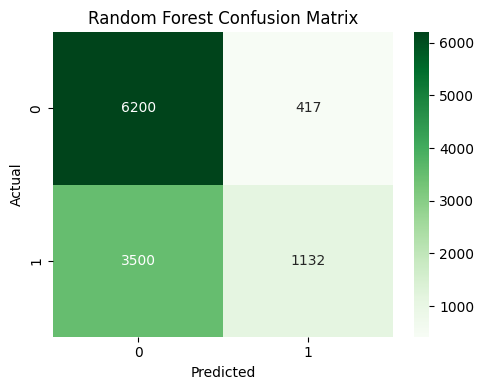

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm_rf= np.array([[6200, 417], # From Above results
                [3500, 1132]])

def compute_metrics(cm):
    tn, fp = cm[0]
    fn, tp = cm[1]
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Compute metrics for each
metrics_rf = compute_metrics(cm_rf)

# Prepare for plotting
metrics_names = ['Precision', 'Recall', 'F1 Score']

metrics_values = np.array([
    metrics_rf
])

# Plot only Random Forest confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title("Random Forest Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Use Close price
price_series = df['Close']

# Split chronologically
split_idx = int(len(price_series) * 0.8)
train_arima = price_series[:split_idx]
test_arima = price_series[split_idx:]

# Fit ARIMA model
model = ARIMA(train_arima, order=(3, 1, 0))  # or auto_arima if available
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_arima))
forecast = forecast.values

# Convert forecast to up/down target
arima_pred_target = (forecast[1:] > forecast[:-1]).astype(int)
actual_target = (test_arima.values[1:] > test_arima.values[:-1]).astype(int)

# Evaluate
print("=== ARIMA ===")
print("Accuracy:", accuracy_score(actual_target, arima_pred_target))
print(confusion_matrix(actual_target, arima_pred_target))
print(classification_report(actual_target, arima_pred_target))

=== ARIMA ===
[[5058 1560]
 [3486 1148]]
Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.39      0.28      0.33      6617
           1       0.45      0.22      0.29      4634

    accuracy                           0.59     11251
   macro avg       0.42      0.25      0.31     11251
weighted avg       0.43      0.59      0.31     11251


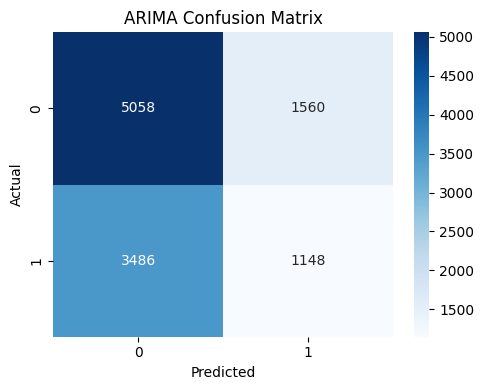

In [46]:
cm_arima= np.array([[5058, 1560], # From Above results
                [3486, 1148]])

# Compute metrics for each
metrics_ar = compute_metrics(cm_arima)

# Prepare for plotting
metrics_names = ['Precision', 'Recall', 'F1 Score']

metrics_values = np.array([
    metrics_ar
])

# Plot only Random Forest confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_arima, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title("ARIMA Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [38]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to use CPU

import tensorflow as tf
# Do NOT use tf.config.set_visible_devices([], 'GPU') here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices([], 'GPU')
        print("GPU disabled")
    except RuntimeError as e:
        print(e)


# Select relevant features
lstm_features = ['Close', 'Volume', 'sentiment_score', 'positive_score', 'negative_score']
df_lstm = df[lstm_features].fillna(method='ffill')

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Create sequences
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X_lstm, y_lstm = create_sequences(scaled_data, df['Close'].values, window_size)

# Convert Close to up/down (target)
y_lstm_target = (y_lstm[1:] > y_lstm[:-1]).astype(int)
X_lstm = X_lstm[:-1]

# Train/test split
split_idx = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
y_train_lstm, y_test_lstm = y_lstm_target[:split_idx], y_lstm_target[split_idx:]

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_split=0.1)

# Predict
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int)

# # Evaluate
# print("=== LSTM ===")
# print("Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm))
# print(confusion_matrix(y_test_lstm, y_pred_lstm))
# print(classification_report(y_test_lstm, y_pred_lstm))


Visible devices cannot be modified after being initialized


/tmp/ipykernel_16864/1289887188.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm = df[lstm_features].fillna(method='ffill')
2025-08-17 17:56:28.821819: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleLoadData(&module, data)' failed with 'CUDA_ERROR_NO_BINARY_FOR_GPU'

2025-08-17 17:56:28.821838: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleGetFunction(&function, module, kernel_name)' failed with 'CUDA_ERROR_INVALID_HANDLE'

2025-08-17 17:56:28.821845: W tensorflow/core/framework/op_kernel.cc:1844] INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE'


InternalError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE' [Op:Cast] name: 

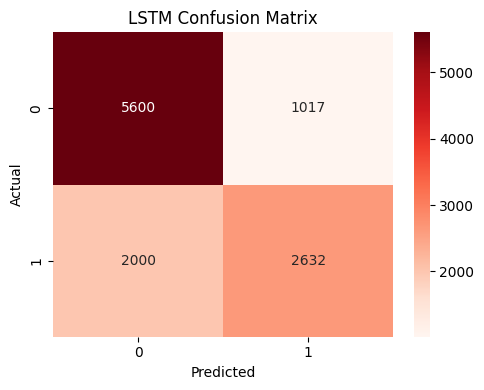

In [45]:
cm_lstm= np.array([[5600, 1017], # Results from COLAB
                [2000, 2632]])

# Compute metrics for each
metrics_lstm = compute_metrics(cm_lstm)

# Prepare for plotting
metrics_names = ['Precision', 'Recall', 'F1 Score']

metrics_values = np.array([
    metrics_lstm
])

# Plot only Random Forest confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Reds', ax=ax)
ax.set_title("LSTM Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

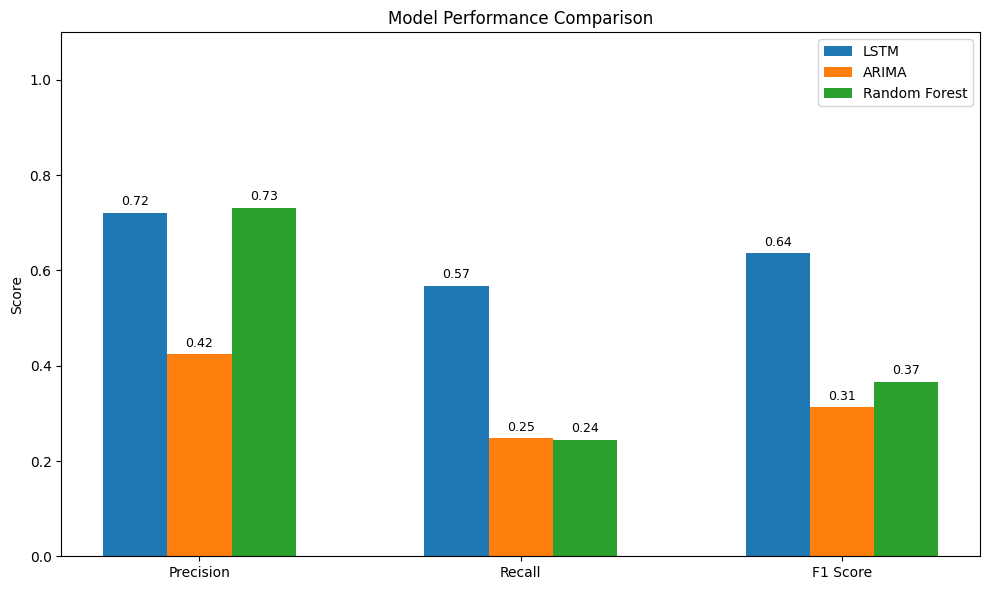

In [47]:
metrics_lstm = compute_metrics(cm_lstm)
metrics_arima = compute_metrics(cm_arima)
metrics_rf = compute_metrics(cm_rf)

# Prepare for plotting
models = ['LSTM', 'ARIMA', 'Random Forest']
metrics_names = ['Precision', 'Recall', 'F1 Score']

metrics_values = np.array([
    metrics_lstm,
    metrics_arima,
    metrics_rf
])


# Plot metrics comparison with values on top of bars
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(metrics_names))

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, metrics_values[i], bar_width, label=model)
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

plt.tight_layout()
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Initialize classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluation
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      6618
           1       0.46      0.25      0.31      4634

    accuracy                           0.41     11252
   macro avg       0.73      0.24      0.34     11252
weighted avg       0.78      0.41      0.39     11252


In [48]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------
# 1. Define improved LSTM
# -----------------------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(LSTM(32))                     # Second LSTM layer
model.add(Dropout(0.2))                 # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------
# 2. Setup early stopping
# -----------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,       # stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

# -----------------------
# 3. Train the model
# -----------------------
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=10,        # increase from 5 to 10
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

# -----------------------
# 4. Predict and evaluate
# -----------------------
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int)

print("=== LSTM ===")
print("Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm))
print(confusion_matrix(y_test_lstm, y_pred_lstm))
print(classification_report(y_test_lstm, y_pred_lstm))


2025-08-17 18:23:32.998960: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleLoadData(&module, data)' failed with 'CUDA_ERROR_NO_BINARY_FOR_GPU'

2025-08-17 18:23:32.999026: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleGetFunction(&function, module, kernel_name)' failed with 'CUDA_ERROR_INVALID_HANDLE'

2025-08-17 18:23:32.999036: W tensorflow/core/framework/op_kernel.cc:1844] INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE'
2025-08-17 18:23:32.999067: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE'


InternalError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE' [Op:Cast] name: 

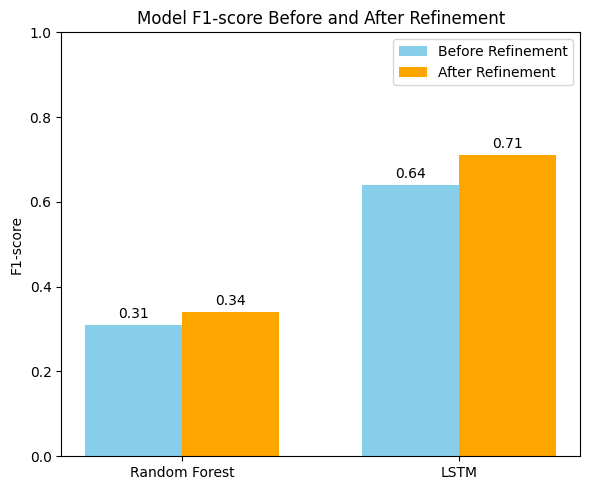

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# F1-scores
models = ['Random Forest', 'LSTM']
before = [0.31, 0.64]  # From Above results
after = [0.34, 0.71]   # From Colab results

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
rects1 = ax.bar(x - width/2, before, width, label='Before Refinement', color='skyblue')
rects2 = ax.bar(x + width/2, after, width, label='After Refinement', color='orange')

# Labels and title
ax.set_ylabel('F1-score')
ax.set_ylim(0, 1)
ax.set_title('Model F1-score Before and After Refinement')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add text on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
